# Implementação Nelder Mead


Pseudo-Gradiente sem derivada

In [290]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

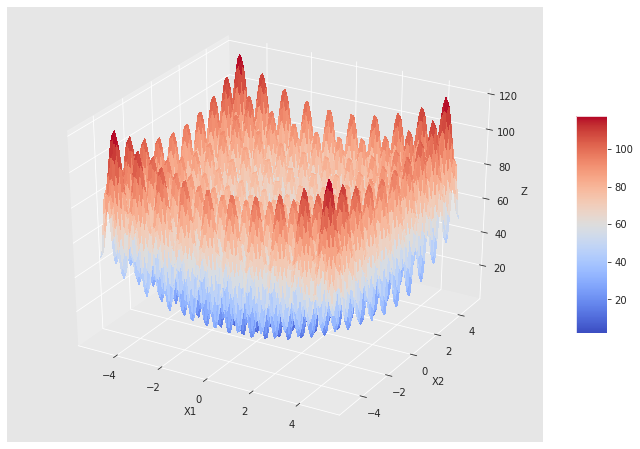

In [291]:
def rastrigin(x1,x2):
    
    a = 20
    
    return 2*a + x1**2 + x2**2 - a*(np.cos(2*3.1415*x1)+np.cos(2*3.1415*x2))

step = 100

x1 = np.linspace(-5, 5, step)
x2 = np.linspace(-5, 5, step)

x1, x2 = np.meshgrid(x1,x2)

z = rastrigin(x1,x2)

fig = plt.figure(figsize=(12,8))

ax = fig.gca(projection='3d')

surf = ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=7, cmap=plt.cm.coolwarm)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')

plt.show()

In [292]:
# Função Para Inicializar a População Aleatória

def inicializa_simplex(lim_superior,lim_inferior,n_individuos):
    
    simplex = np.random.uniform(lim_inferior,lim_superior,size=([n_individuos,2]))

    z_inicial = rastrigin(simplex[:,0], simplex[:,1])
    
    return simplex, z_inicial


# ordena simplex

def ordena(simplex,z):
    
    m = np.concatenate((simplex,z.reshape(1,-1).T), axis=1)
    index=np.argsort(m[:,-1])
    return m[index]

# Função Calcula Centróide

def calcula_centroide(simplex): #exceto pior ponto
    
    xc = np.sum(simplex,axis=0)/len(simplex)
    return xc


# calcula ponto refletido


def calcula_refletido(simplex, xc,alfa):
    
    return xc+alfa*(xc-simplex[-1,:-1])
    
# atualiza pior ponto com o refletido se for melhor

def atualiza_refletido(xr, simplex_ord):
    
    z_r = rastrigin(xr[0],xr[1])
    
    flag = False
    
    if z_r < simplex_ord[-2,-1] and z_r > simplex_ord[0,-1]:
        
        simplex_ord[-1,:-1] = xr
        simplex_ord[-1,-1] = z_r
        flag=True
        
    return simplex_ord, flag


def calcula_expandido(xr,simplex_ord,gamma):
    
    z_r = rastrigin(xr[0],xr[1])
    
    flag = False
    
    if z_r < simplex_ord[0,-1]:
  
        xe = xr + gamma*(xr-xc)
        flag=True
    
    else: 
        xe=False
        
    return xe, flag


def atualiza_expandido(xe,xr,simplex_ord):
    
    z_e = rastrigin(xe[0],xe[1])
    z_r = rastrigin(xr[0],xr[1])
    

    if z_e <z_r:
        
        simplex_ord[-1,:-1] = xe
        simplex_ord[-1,-1] = z_e
        
    else:
        
        simplex_ord[-1,:-1] = xr
        simplex_ord[-1,-1] = z_r
        
    return simplex_ord

        

def calcula_contracao(xr,simplex_ord,ro):
    
    z_r = rastrigin(xr[0],xr[1])
    
    flag = False
    
    if z_r > simplex_ord[-2,-1]:
        
        xc = xr+ro*(simplex_ord[-2,:-1]-xr) 
        flag=True
        
    else:
        
        xc=False
        
    return xc, flag
    
    
def atualiza_contracao(xc,xr,simplex_ord):
    
    z_c = rastrigin(xc[0],xc[1])
    
    flag = False
    
    if z_c<simplex_ord[-1,-1]:
        flag=True
        simplex_ord[-1,:-1] = xc
        simplex_ord[-1,-1] = z_c
        
    
    return simplex_ord, flag
        
def calcula_shrink(simplex_ord,sigma):
    
    best = np.copy(simplex_ord[0,:])
    
    simplex_ord[:,:-1] = best[:-1] + sigma*(simplex_ord[:,:-1]-best[:-1])
    
    simplex_ord[0,:] = best
    
    new_z = rastrigin(simplex_ord[:,0],simplex_ord[:,1])
    
    return simplex_ord, new_z
    
    

In [293]:

def nelder_mead(max_iter, alfa, gamma, ro, sigma, simplex_size, mini, maxi):

    lista_best = []
    lista_pontos = []
    simplex, z = inicializa_simplex(maxi,mini,simplex_size)

    for i in range(max_iter):

        z = np.abs(z)

        simplex_ordenado = ordena(simplex,np.abs(z))

        lista_pontos.append(simplex_ordenado[:,:-1])


        xc = calcula_centroide(simplex_ordenado[:,:-1])

        xr = calcula_refletido(simplex_ordenado, xc,alfa)

        simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

        while flag == True:


#             print('Entrou Reflexão')
            simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

            xc = calcula_centroide(simplex_ordenado[:,:-1])

            xr = calcula_refletido(simplex_ordenado, xc,alfa)

            simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)


        xe, flag = calcula_expandido(xr,simplex_ordenado,gamma)

        while(flag==True):


#             print('Entrou Expansão')
            simplex_n = atualiza_expandido(xe,xr,simplex_ordenado)

            simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

            xc = calcula_centroide(simplex_ordenado[:,:-1])

            xr = calcula_refletido(simplex_ordenado, xc,alfa)

            simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

            while flag == True:

#                 print('Entrou Reflexão')
                simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

                xc = calcula_centroide(simplex_ordenado[:,:-1])

                xr = calcula_refletido(simplex_ordenado, xc,alfa)

                simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

            xe, flag = calcula_expandido(xr,simplex_ordenado,gamma)



        xc, flag = calcula_contracao(xr,simplex_ordenado,ro)

        if flag==True:

            simplex_n, flag = atualiza_contracao(xc,xr,simplex_ordenado)

            while(flag==True):


#                 print('Entrou Contração')

                simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

                xc = calcula_centroide(simplex_ordenado[:,:-1])

                xr = calcula_refletido(simplex_ordenado, xc,alfa)

                simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

                while flag == True:


#                     print('Entrou Reflexão')
                    simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

                    xc = calcula_centroide(simplex_ordenado[:,:-1])

                    xr = calcula_refletido(simplex_ordenado, xc,alfa)

                    simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)


                xe, flag = calcula_expandido(xr,simplex_ordenado,gamma)

                while(flag==True):


#                     print('Entrou Expansão')
                    simplex_n = atualiza_expandido(xe,xr,simplex_ordenado)

                    simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

                    xc = calcula_centroide(simplex_ordenado[:,:-1])

                    xr = calcula_refletido(simplex_ordenado, xc,alfa)

                    simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

                    while flag == True:

                        
                        simplex_ordenado = ordena(simplex_n[:,:-1],np.abs(simplex_n[:,-1]))

                        xc = calcula_centroide(simplex_ordenado[:,:-1])

                        xr = calcula_refletido(simplex_ordenado, xc,alfa)

                        simplex_n, flag = atualiza_refletido(xr, simplex_ordenado)

                    xe, flag = calcula_expandido(xr,simplex_ordenado,gamma)



                xc, flag = calcula_contracao(xr,simplex_ordenado,ro)

                if flag==True:

                    simplex_n, flag = atualiza_contracao(xc,xr,simplex_ordenado)



                ################

        simplex, z = calcula_shrink(simplex_ordenado,sigma)
        simplex=simplex[:,:-1]

        lista_best.append(min(z))
        
    return lista_best, lista_pontos

# Exemplo 1

In [294]:


lista_best, lista_pontos = nelder_mead(max_iter=10, alfa=1, gamma=2, ro=0.5, sigma=0.5, simplex_size=500,mini=-5000,maxi=5000)

Text(0.5, 0, 'X2')

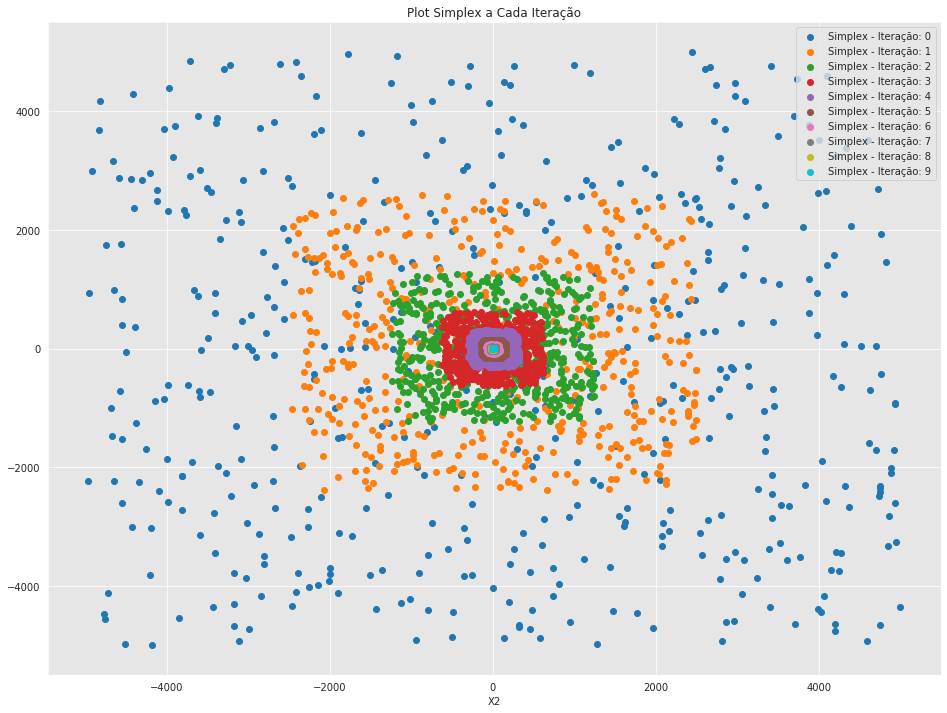

In [295]:
plt.figure(figsize=(16,12))

i=0

for lista in lista_pontos:

    plt.scatter(lista[:,0],lista[:,1],label=f'Simplex - Iteração: {i}')
    i=i+1

plt.legend()
plt.title('Plot Simplex a Cada Iteração')
plt.xlabel('X1')
plt.xlabel('X2')

Text(0, 0.5, 'Função Objetivo')

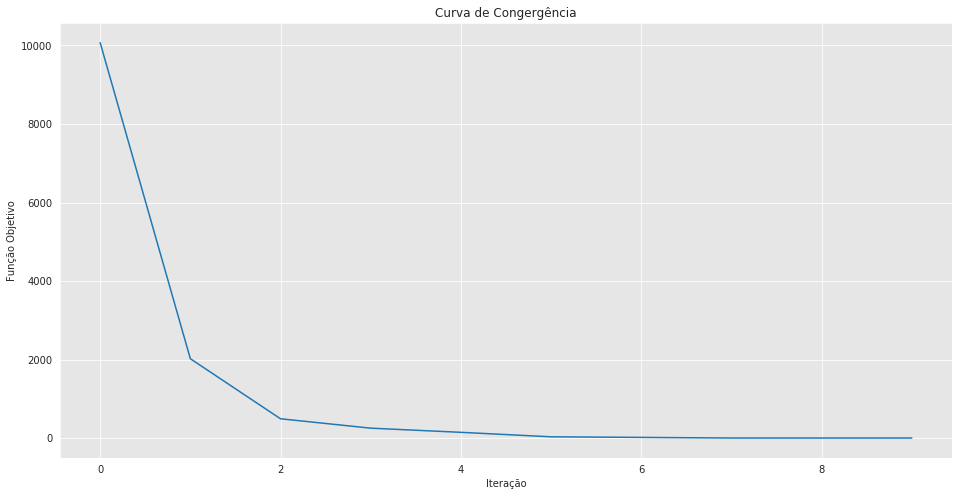

In [296]:
plt.figure(figsize=(16,8))
plt.plot(lista_best)
plt.title('Curva de Congergência')
plt.xlabel('Iteração')
plt.ylabel('Função Objetivo')



# Exemplo 2

In [297]:
lista_best, lista_pontos = nelder_mead(max_iter=10, alfa=1, gamma=2, ro=0.5, sigma=0.5, simplex_size=500,mini=-2000,maxi=50000)

Text(0.5, 0, 'X2')

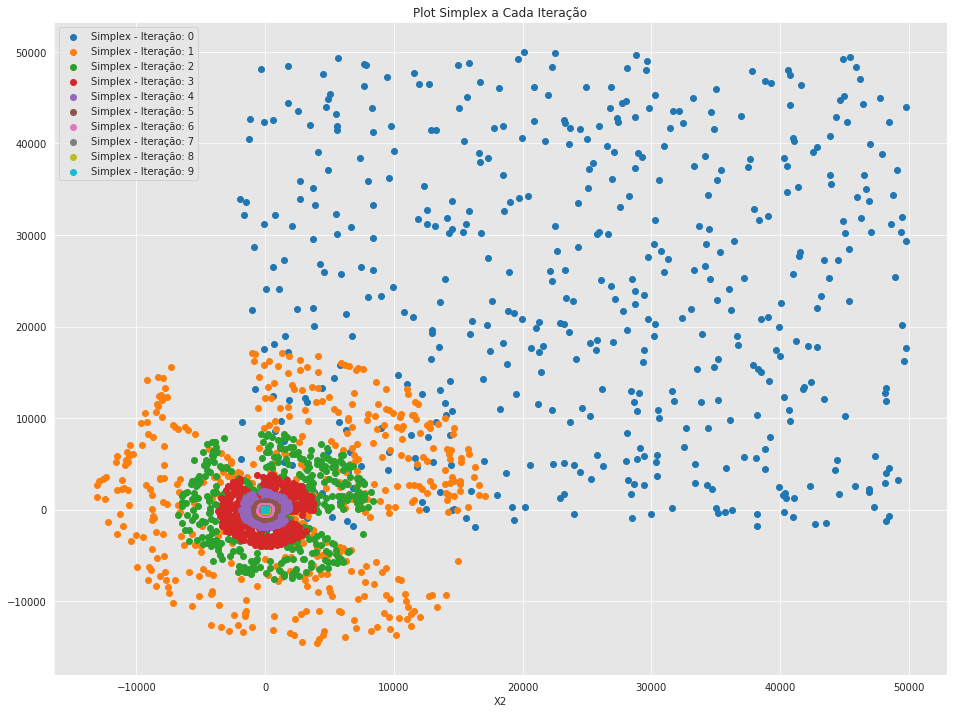

In [298]:
plt.figure(figsize=(16,12))

i=0

for lista in lista_pontos:

    plt.scatter(lista[:,0],lista[:,1],label=f'Simplex - Iteração: {i}')
    i=i+1

plt.legend()
plt.title('Plot Simplex a Cada Iteração')
plt.xlabel('X1')
plt.xlabel('X2')

Text(0, 0.5, 'Função Objetivo')

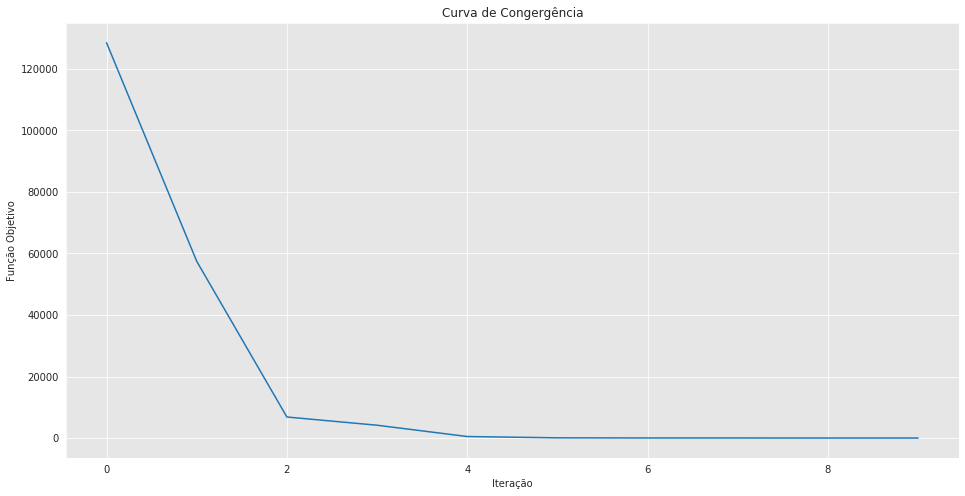

In [299]:
plt.figure(figsize=(16,8))
plt.plot(lista_best)
plt.title('Curva de Congergência')
plt.xlabel('Iteração')
plt.ylabel('Função Objetivo')



# Exemplo 3

In [300]:


lista_best, lista_pontos = nelder_mead(max_iter=10, alfa=1, gamma=2, ro=0.5, sigma=0.5, simplex_size=500,mini=100,maxi=300)

Text(0, 0.5, 'Função Objetivo')

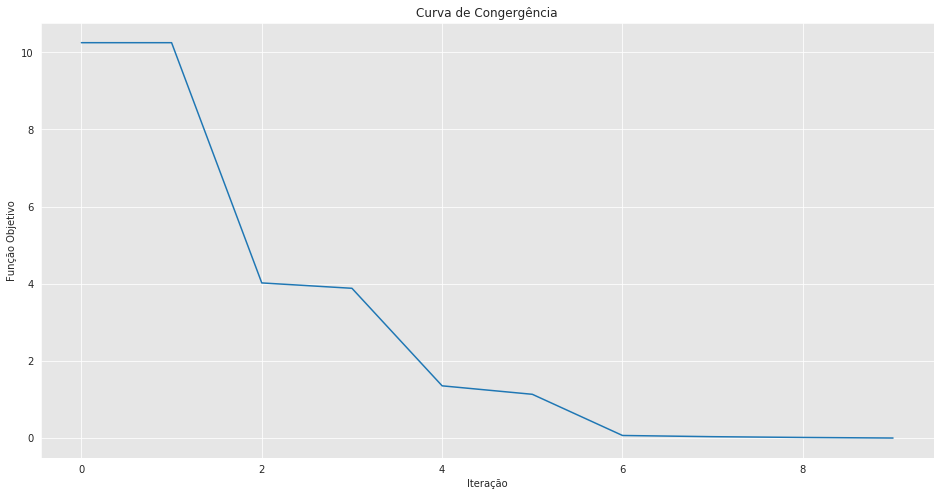

In [301]:
plt.figure(figsize=(16,8))
plt.plot(lista_best)
plt.title('Curva de Congergência')
plt.xlabel('Iteração')
plt.ylabel('Função Objetivo')



Text(0.5, 0, 'X2')

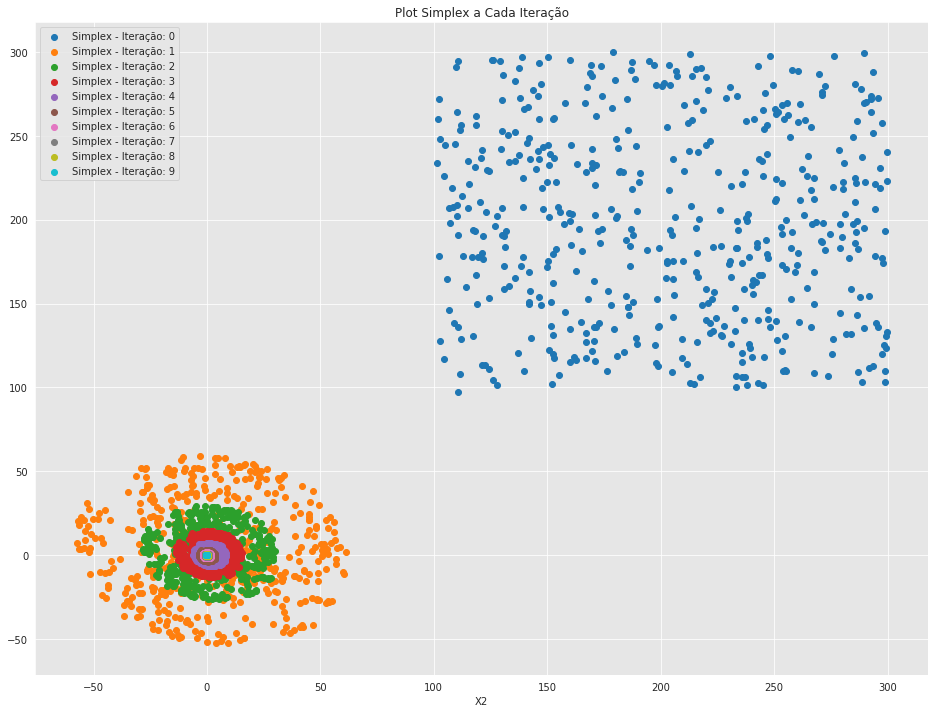

In [302]:
plt.figure(figsize=(16,12))

i=0

for lista in lista_pontos:

    plt.scatter(lista[:,0],lista[:,1],label=f'Simplex - Iteração: {i}')
    i=i+1

plt.legend()
plt.title('Plot Simplex a Cada Iteração')
plt.xlabel('X1')
plt.xlabel('X2')